# Logistic Regression for Beginners

## 📌 What is Logistic Regression?
Logistic Regression is used when we want to **classify** things into **categories** such as Yes/No, Pass/Fail, or Spam/Not Spam.

- It outputs probabilities.
- Uses an S-shaped curve called **sigmoid**.
- It is different from linear regression which predicts continuous values.

## Sigmoid Function

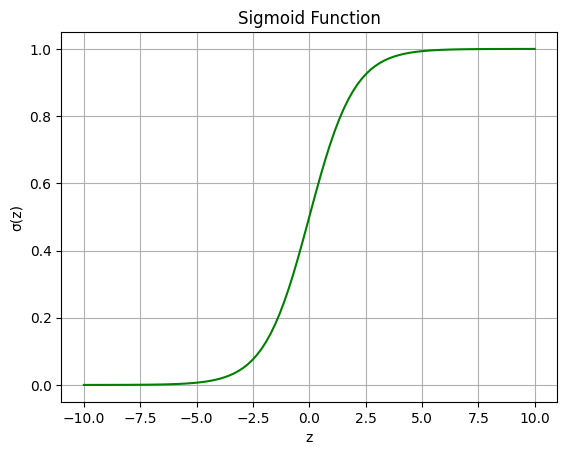

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid, color='green')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

## Logistic Regression on Iris Dataset (2 Classes Only)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load the iris dataset
iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[13  0]
 [ 0 12]]


## Confusion Matrix Explained
- **True Positive (TP):** Predicted Yes, Actual Yes
- **True Negative (TN):** Predicted No, Actual No
- **False Positive (FP):** Predicted Yes, Actual No
- **False Negative (FN):** Predicted No, Actual Yes

## Cost Function - Log Loss
We use **Log Loss** to measure how well the model predicts probabilities.

### Formula:
$$ \text{Log Loss} = -[y \log(p) + (1 - y) \log(1 - p)] $$

Where:
- `y` is the actual class (0 or 1)
- `p` is the predicted probability

## ✅ Summary
- Logistic Regression is for classification
- Outputs probabilities using sigmoid
- Works well with binary (2-class) problems
- We evaluate it using accuracy and confusion matrix

## Logistic Regression for Multiple Classes

Logistic regression can also handle **more than two classes**. This is called **multiclass classification**.

- In the Iris dataset, we have 3 flower types:
  - Setosa (0)
  - Versicolor (1)
  - Virginica (2)

To handle this, logistic regression uses:
- **One-vs-Rest (OvR)**: Train a separate model for each class vs all others.
- Or **Softmax** (in multinomial setting).


## Summary

- Logistic Regression works for both **binary** and **multiclass** problems.
- It uses **sigmoid** or **softmax** functions.
- We visualize results using **decision boundaries** when working with 2D data.
- The Iris dataset is perfect for experimenting with 2-class or 3-class classification.


c:\Users\hii\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


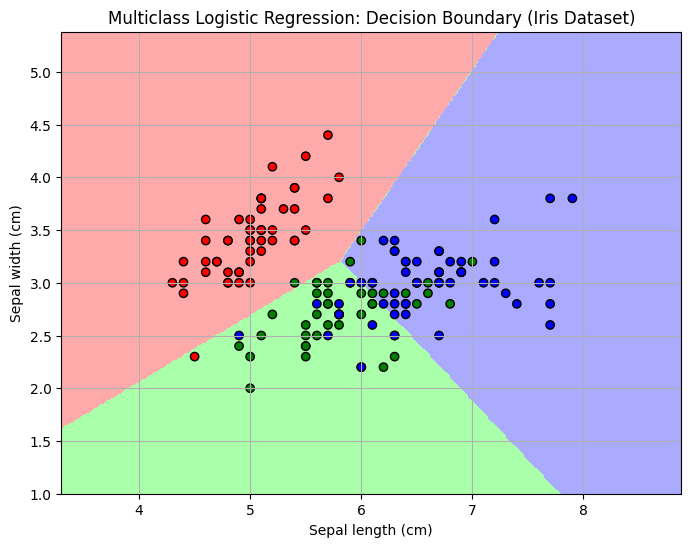

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use only 2 features for easy 2D visualization
y = iris.target

# Train the Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X, y)

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
            cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Multiclass Logistic Regression: Decision Boundary (Iris Dataset)')
plt.grid(True)
plt.show()
